Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         xx/xx/xxxx
Name:         student name
Worked with:  other students' name
Location:     nyc17_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


### Challenge 1

- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from copy import deepcopy


%matplotlib inline

In [3]:
## a function to get data from MTA website

def get_data(FileNames):
    ttAll = pd.DataFrame()
    path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'

    for fle in FileNames:
        url=path.format(fle)
        tt = pd.read_csv(url)
        ttAll = pd.concat([ttAll,tt])
    ttAll.columns = [col.strip() for col in ttAll.columns]
    return ttAll

In [4]:
FileNames = []

for i in range(0,10):
    newdate = (datetime.strptime('20160917' , '%Y%m%d')
               - timedelta(days= i*7))
    FileNames.append(newdate.strftime('%Y%m%d')[2:])
ttAll = get_data(FileNames)

In [5]:
ttAll.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180


### Challenge 2

Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [6]:
ttTimeEntry = deepcopy(ttAll)

In [7]:
keeping = ['C/A','UNIT','SCP','STATION','DATE','TIME','ENTRIES']
ttTimeEntry = ttTimeEntry[keeping]
ttTimeEntry.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,09/10/2016,00:00:00,5817505
1,A002,R051,02-00-00,59 ST,09/10/2016,04:00:00,5817544
2,A002,R051,02-00-00,59 ST,09/10/2016,08:00:00,5817564
3,A002,R051,02-00-00,59 ST,09/10/2016,12:00:00,5817678
4,A002,R051,02-00-00,59 ST,09/10/2016,16:00:00,5817925


In [8]:
ttTimeEntry['DT'] = ttTimeEntry['DATE']+' '+ttTimeEntry['TIME']

In [9]:
ttTimeEntry['DT'] = pd.to_datetime(ttTimeEntry['DT'])

In [10]:
tt4Dict = ttTimeEntry.iloc[:,[0,1,2,3,7,6]]

In [11]:
tt4Dict.head()

,C/A,UNIT,SCP,STATION,DT,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-09-10 00:00:00,5817505
1,A002,R051,02-00-00,59 ST,2016-09-10 04:00:00,5817544
2,A002,R051,02-00-00,59 ST,2016-09-10 08:00:00,5817564
3,A002,R051,02-00-00,59 ST,2016-09-10 12:00:00,5817678
4,A002,R051,02-00-00,59 ST,2016-09-10 16:00:00,5817925


In [12]:
## Try to creat a dictionary from dataframe - just a try
ttDict = {k: [[i,j] for i,j in zip(g['DT'].tolist(),g['ENTRIES'].tolist())] for k,g in tt4Dict.groupby(['C/A','UNIT','SCP','STATION'])}

count = 1
for i,j in ttDict.items():
    print(i, ': ', j)
    count +=1
    if count>1:
        break


('A002', 'R051', '02-00-00', '59 ST') :  [[Timestamp('2016-09-10 00:00:00'), 5817505], [Timestamp('2016-09-10 04:00:00'), 5817544], [Timestamp('2016-09-10 08:00:00'), 5817564], [Timestamp('2016-09-10 12:00:00'), 5817678], [Timestamp('2016-09-10 16:00:00'), 5817925], [Timestamp('2016-09-10 20:00:00'), 5818247], [Timestamp('2016-09-11 00:00:00'), 5818403], [Timestamp('2016-09-11 04:00:00'), 5818439], [Timestamp('2016-09-11 08:00:00'), 5818451], [Timestamp('2016-09-11 12:00:00'), 5818522], [Timestamp('2016-09-11 16:00:00'), 5818722], [Timestamp('2016-09-11 20:00:00'), 5818974], [Timestamp('2016-09-12 00:00:00'), 5819116], [Timestamp('2016-09-12 04:00:00'), 5819125], [Timestamp('2016-09-12 08:00:00'), 5819168], [Timestamp('2016-09-12 12:00:00'), 5819339], [Timestamp('2016-09-12 16:00:00'), 5819681], [Timestamp('2016-09-12 20:00:00'), 5820548], [Timestamp('2016-09-13 00:00:00'), 5820776], [Timestamp('2016-09-13 04:00:00'), 5820796], [Timestamp('2016-09-13 08:00:00'), 5820850], [Timestamp('2

### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [13]:
tt = (ttTimeEntry
      .groupby(['C/A','UNIT','SCP','STATION','DT'])
      .ENTRIES.count()
      .reset_index())
tt.head()

,C/A,UNIT,SCP,STATION,DT,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-07-09 00:00:00,1
1,A002,R051,02-00-00,59 ST,2016-07-09 04:00:00,1
2,A002,R051,02-00-00,59 ST,2016-07-09 08:00:00,1
3,A002,R051,02-00-00,59 ST,2016-07-09 12:00:00,1
4,A002,R051,02-00-00,59 ST,2016-07-09 16:00:00,1


The counts are every **_4_** hours

In [14]:
mainkey = ['C/A','UNIT','SCP','STATION']
ttTimeEntry.sort_values(mainkey + ['DT'], inplace = True, ascending = False)

In [15]:
ttTimeEntry.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DT
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,21:00:00,5554,2016-09-16 21:00:00
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,17:00:00,5554,2016-09-16 17:00:00
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,13:00:00,5554,2016-09-16 13:00:00
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,09:00:00,5554,2016-09-16 09:00:00
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,05:00:00,5554,2016-09-16 05:00:00


In [16]:
## drop duplicates as suggested by Joe
ttTimeEntry.drop_duplicates(subset = mainkey + ['DT'], inplace = True)

In [17]:
ttDaily = (ttTimeEntry.groupby(mainkey+['DATE'])
           .ENTRIES.first().reset_index())
ttDaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,07/09/2016,5732227
1,A002,R051,02-00-00,59 ST,07/10/2016,5732955
2,A002,R051,02-00-00,59 ST,07/11/2016,5734417
3,A002,R051,02-00-00,59 ST,07/12/2016,5736151
4,A002,R051,02-00-00,59 ST,07/13/2016,5737897


In [18]:
ttDaily['DailyEntry'] = ttDaily.ENTRIES.diff()

In [19]:
ttDaily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DailyEntry
0,A002,R051,02-00-00,59 ST,07/09/2016,5732227,NaN
1,A002,R051,02-00-00,59 ST,07/10/2016,5732955,728.0
2,A002,R051,02-00-00,59 ST,07/11/2016,5734417,1462.0
3,A002,R051,02-00-00,59 ST,07/12/2016,5736151,1734.0
4,A002,R051,02-00-00,59 ST,07/13/2016,5737897,1746.0


### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

/Users/Chuoran/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


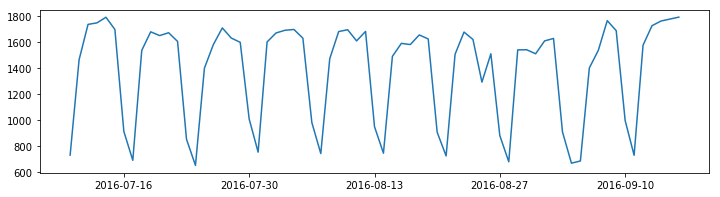

In [20]:
OneTT = ((ttDaily['C/A'] == 'A002')&
         (ttDaily['UNIT'] == 'R051')&
         (ttDaily['SCP']=='02-00-00')&
         (ttDaily['STATION']=='59 ST'))
tt1 = ttDaily[OneTT]
tt1.head()
tt1.DATE = pd.to_datetime(tt1.DATE)
plt.figure(figsize = (12,3))
plt.plot(tt1['DATE'],tt1['DailyEntry'])

### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


In [21]:
def correct_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
#         print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter


In [22]:
ttAll['PREV_ENTRIES'] = ttAll['ENTRIES'].shift(-1)

In [23]:
ttAll.dropna(subset= ['PREV_ENTRIES','ENTRIES'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,5817544.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,5817564.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,5817678.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,5817925.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,5818247.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,20:00:00,REGULAR,5818247,1972245,5818403.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,00:00:00,REGULAR,5818403,1972285,5818439.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,04:00:00,REGULAR,5818439,1972293,5818451.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,08:00:00,REGULAR,5818451,1972308,5818522.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,12:00:00,REGULAR,5818522,1972380,5818722.0


In [24]:
ttAll['Corrected_Entry'] = ttAll.apply(correct_counts,axis=1,max_counter = 10000)

In [25]:
ttAll.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_ENTRIES,Corrected_Entry
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,5817544.0,39.0
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,5817564.0,20.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,5817678.0,114.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,5817925.0,247.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,5818247.0,322.0


In [26]:
ttDailyClean = (ttAll
                .groupby(mainkey+['DATE'])['Corrected_Entry']
                .sum().reset_index())
ttDailyClean.head()

,C/A,UNIT,SCP,STATION,DATE,Corrected_Entry
0,A002,R051,02-00-00,59 ST,07/09/2016,863.0
1,A002,R051,02-00-00,59 ST,07/10/2016,700.0
2,A002,R051,02-00-00,59 ST,07/11/2016,1592.0
3,A002,R051,02-00-00,59 ST,07/12/2016,1747.0
4,A002,R051,02-00-00,59 ST,07/13/2016,1760.0


### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.


In [27]:
StationDailyClean = (ttDailyClean
                     .groupby(['C/A','UNIT','STATION','DATE'])
                     .Corrected_Entry.sum().reset_index())
StationDailyClean.DATE = pd.to_datetime(StationDailyClean.DATE)
StationDailyClean.head()

,C/A,UNIT,STATION,DATE,Corrected_Entry
0,A002,R051,59 ST,2016-07-09,9468.0
1,A002,R051,59 ST,2016-07-10,7763.0
2,A002,R051,59 ST,2016-07-11,16917.0
3,A002,R051,59 ST,2016-07-12,17860.0
4,A002,R051,59 ST,2016-07-13,18248.0


### Challenge 7

Plot the time series for a station.

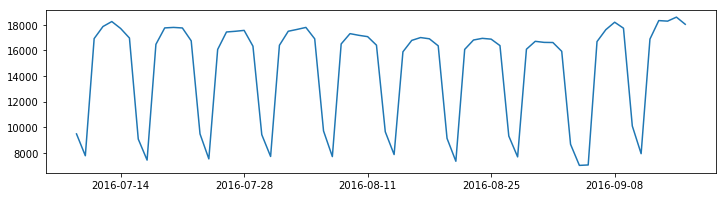

In [29]:
pickedstation = ((StationDailyClean['C/A']=='A002')
            &(StationDailyClean['UNIT']=='R051')
           &(StationDailyClean['STATION']=='59 ST'))
stationplot = StationDailyClean[pickedstation]
plt.figure(figsize = (12,3))
plt.plot(stationplot['DATE'],stationplot['Corrected_Entry'])

### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [30]:
StationDailyClean['DOW']= (StationDailyClean.DATE
                           .apply(lambda x: x.weekday()))
StationDailyClean['DOW']= (StationDailyClean.DOW
                           .apply(lambda x: 7 if x == 0 else x))

In [31]:
StationDailyClean.tail()

,C/A,UNIT,STATION,DATE,Corrected_Entry,DOW
50757,TRAM2,R469,RIT-ROOSEVELT,2016-09-12,3813.0,7
50758,TRAM2,R469,RIT-ROOSEVELT,2016-09-13,4064.0,1
50759,TRAM2,R469,RIT-ROOSEVELT,2016-09-14,3894.0,2
50760,TRAM2,R469,RIT-ROOSEVELT,2016-09-15,4203.0,3
50761,TRAM2,R469,RIT-ROOSEVELT,2016-09-16,15351.0,4


In [32]:
def week_count_plot (ca, unit, station, week):
    picked = ((StationDailyClean['C/A']==ca)&
             (StationDailyClean['UNIT']==unit)&
             (StationDailyClean['STATION']==station)) 
    r = -4+week*7
    forweekplot = StationDailyClean[picked].iloc[r:r+7,]
    plt.plot(forweekplot['DOW'],forweekplot['Corrected_Entry'])

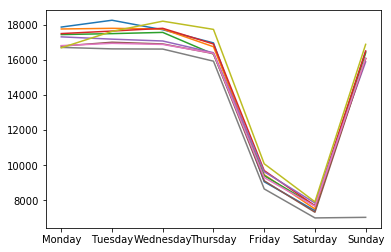

In [35]:
(plt.xticks([1,2,3,4,5,6,7],
    ['Monday','Tuesday','Wednesday',
     'Thursday','Friday','Saturday','Sunday']))
for week in range(1,10):
    week_count_plot('A002','R051','59 ST',week)

### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [54]:
StationComparison = (StationDailyClean
                     .groupby(['C/A','UNIT','STATION'])
                     [['DATE','Corrected_Entry']]
                     .sum()
                     .reset_index()
                     .sort_values(['Corrected_Entry'], ascending = False))

In [56]:
StationComparison.head(3)

,C/A,UNIT,STATION,Corrected_Entry
553,R238,R046,GRD CNTRL-42 ST,3518728.0
476,R138,R293,34 ST-PENN STA,2854327.0
568,R250,R179,86 ST,2823447.0


**The stations that have the heaviest weekly traffic are Grand Central, 34 st-Penn Station, 86 St.**

### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xtick'

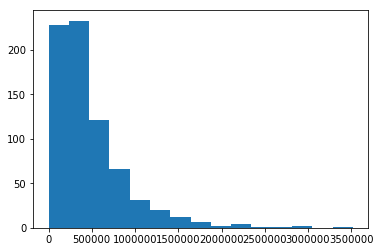

In [61]:
plt.hist(StationComparison['Corrected_Entry'],bins=15)
plt.xtick()

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)